# SparkSQL and DataFrames 

<a href = "http://yogen.io"><img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/></a>

## RDDs, DataSets, and DataFrames

RDDs are the original interface for Spark programming.

DataFrames were introduced in 1.3

Datasets were introduced in 1.6, and unified with DataFrames in 2.0

### Advantages of DataFrames:

from https://www.datacamp.com/community/tutorials/apache-spark-python:

> More specifically, the performance improvements are due to two things, which you’ll often come across when you’re reading up DataFrames: custom memory management (project Tungsten), which will make sure that your Spark jobs much faster given CPU constraints, and optimized execution plans (Catalyst optimizer), of which the logical plan of the DataFrame is a part.

## SparkSQL and DataFrames 


pyspark does not have the Dataset API, which is available only if you use Spark from a statically typed language: Scala or Java.

From https://spark.apache.org/docs/2.4.4/sql-programming-guide.html

> A DataFrame is a Dataset organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs. The DataFrame API is available in Scala, Java, Python, and R. In Scala and Java, a DataFrame is represented by a Dataset of Rows. In the Scala API, DataFrame is simply a type alias of Dataset[Row]. While, in Java API, users need to use Dataset&lt;Row> to represent a DataFrame.


### The pyspark.sql module

Important classes of Spark SQL and DataFrames:

* `pyspark.sql.SparkSession` Main entry point for DataFrame and SQL functionality.

* `pyspark.sql.DataFrame` A distributed collection of data grouped into named columns.

* `pyspark.sql.Column` A column expression in a DataFrame.

* `pyspark.sql.Row` A row of data in a DataFrame.

* `pyspark.sql.GroupedData` Aggregation methods, returned by DataFrame.groupBy().

* `pyspark.sql.DataFrameNaFunctions` Methods for handling missing data (null values).

* `pyspark.sql.DataFrameStatFunctions` Methods for statistics functionality.

* `pyspark.sql.functions` List of built-in functions available for DataFrame.

* `pyspark.sql.types` List of data types available.

* `pyspark.sql.Window` For working with window functions.

http://spark.apache.org/docs/2.4.4/api/python/pyspark.sql.html

https://spark.apache.org/docs/2.4.4/sql-programming-guide.html

## SparkSession

The traditional way to interact with Spark is the SparkContext. In the notebooks we get that from the pyspark driver.

From 2.0 we can use SparkSession to replace SparkConf, SparkContext and SQLContext

### If you are running this notebook in Google Colab

Copy the following to a code cell and run it. It will install and set up Spark for you.

```python
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.uvigo.es/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar -xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark pyspark==2.4.6

import os
import findspark
from pyspark.sql import SparkSession

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
```

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.uvigo.es/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar -xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark pyspark==2.4.6
 
import os
import findspark
from pyspark.sql import SparkSession
 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"
findspark.init()
spark = SparkSession.builder.master("local[*]").config("spark.ui.port", "4050").getOrCreate()

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2020-07-20 16:31:59--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.168.28, 54.208.57.0, 34.194.108.77, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.168.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  38.5MB/s    in 0.3s    

2020-07-20 16:31:59 (38.5 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://74b7ab714b4f.ngrok.io


#### Passing other options to spark session:
    
    

In [ ]:
spark = SparkSession.builder.config('someconfigkey', 'someconfigvalue').getOrCreate()

We can check option values in the resulting session like this:

In [ ]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1595056035824'),
 ('spark.driver.port', '35545'),
 ('spark.driver.host', '07272e473bf8'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell'),
 ('someconfigkey', 'someconfigvalue')]

### Creating DataFrames

SparkSession.createDataFrame: from an RDD, a list or a pandas.DataFrame.

In [ ]:
import random

random.seed(42)
n = 20
creatures = random.choices(['elf', 'orc', 'halfling'], k=n)

rows = list(zip(range(n), creatures))
rows

[(0, 'orc'),
 (1, 'elf'),
 (2, 'elf'),
 (3, 'elf'),
 (4, 'halfling'),
 (5, 'halfling'),
 (6, 'halfling'),
 (7, 'elf'),
 (8, 'orc'),
 (9, 'elf'),
 (10, 'elf'),
 (11, 'orc'),
 (12, 'elf'),
 (13, 'elf'),
 (14, 'orc'),
 (15, 'orc'),
 (16, 'elf'),
 (17, 'orc'),
 (18, 'halfling'),
 (19, 'elf')]

In [ ]:
df = spark.createDataFrame(rows)
df

DataFrame[_1: bigint, _2: string]

In [ ]:
df.show(5)

+---+--------+
| _1|      _2|
+---+--------+
|  0|     orc|
|  1|     elf|
|  2|     elf|
|  3|     elf|
|  4|halfling|
+---+--------+
only showing top 5 rows



In [ ]:
df.rdd

MapPartitionsRDD[12] at javaToPython at NativeMethodAccessorImpl.java:0

In [ ]:
df.rdd.take(5)

[Row(_1=0, _2='orc'),
 Row(_1=1, _2='elf'),
 Row(_1=2, _2='elf'),
 Row(_1=3, _2='elf'),
 Row(_1=4, _2='halfling')]

In [ ]:
from pyspark.sql import Row



a_row = Row(x=1, y=0.5)
a_row

Row(x=1, y=0.5)

In [ ]:
a_row['x']

1

### Creating DataFrames

* From RDDs
* from Hive tables
* From Spark sources: parquet (default), json, jdbc, orc, libsvm, csv, text


In [ ]:
df = spark.createDataFrame(rows, schema=['id', 'race'])
df

DataFrame[id: bigint, race: string]

#### From RDDs

In [ ]:
!wget -v http://www.gutenberg.org/files/100/100-0.txt -O shakespeare.txt

--2020-07-18 07:09:55--  http://www.gutenberg.org/files/100/100-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5777367 (5.5M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   5.51M  1.33MB/s    in 4.1s    

2020-07-18 07:09:59 (1.33 MB/s) - ‘shakespeare.txt’ saved [5777367/5777367]



In [ ]:
import re

def remove_punctuation(line):
  return re.sub('[^a-z0-9 ]', '', line.lower())

shakespeare = spark.sparkContext.textFile('shakespeare.txt')

freqs = shakespeare.map(remove_punctuation)\
                   .flatMap(str.split)\
                   .map(lambda word: (word, 1))\
                   .reduceByKey(lambda x, y: x + y)

freqs.take(5)          

[('project', 107),
 ('of', 18811),
 ('shakespeare', 13),
 ('this', 7177),
 ('ebook', 14)]

In [ ]:
freqs_df = spark.createDataFrame(freqs, schema=['word', 'times'])
freqs_df

DataFrame[word: string, times: bigint]

### Inferring and specifying schemas

In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- race: string (nullable = true)



#### Fully specifying a schema

We need to create a `StructType` composed of `StructField`s. each of those specifies afiled with name, type and `nullable` properties. 

In [ ]:
from pyspark.sql import types

types.IntegerType()
types.FloatType()
types.DoubleType()

DoubleType

In [ ]:
coord_type = types.StructType(fields=[types.StructField('x', types.FloatType()), 
                                      types.StructField('y', types.FloatType())])

coord_type

StructType(List(StructField(x,FloatType,true),StructField(y,FloatType,true)))

#### From csv files

We can either read them directly into dataframes or read them as RDDs and transform that into a DataFrame. This second way will be very useful if we have unstructured data like web server logs.

In [ ]:
!zcat coupon150720.csv.gz | head -n 5

79062005698500,1,MAA,AUH,9W,9W,56.79,USD,1,H,H,0526,150904,OK,IAF0
79062005698500,2,AUH,CDG,9W,9W,84.34,USD,1,H,H,6120,150905,OK,IAF0
79062005924069,1,CJB,MAA,9W,9W,60.0,USD,1,H,H,2768,150721,OK,IAA0
79065668570385,1,DEL,DXB,9W,9W,160.63,USD,2,S,S,0546,150804,OK,INA0
79065668737021,1,AUH,IXE,9W,9W,152.46,USD,1,V,V,0501,150803,OK,INA0


In [ ]:
coupons = spark.read.csv('coupon150720.csv.gz', inferSchema=True)
coupons

DataFrame[_c0: bigint, _c1: int, _c2: string, _c3: string, _c4: string, _c5: string, _c6: double, _c7: string, _c8: int, _c9: string, _c10: string, _c11: string, _c12: int, _c13: string, _c14: string]

In [ ]:
coupons = spark.sql('''SELECT _c0 AS tkt_number, 
                              _c2 AS origin,  
                              _c3 AS dest
                       FROM csv.`coupon150720.csv.gz`''')
coupons

DataFrame[tkt_number: string, origin: string, dest: string]

#### From other types of data


Apache Parquet is a free and open-source column-oriented data store of the Apache Hadoop ecosystem. It is similar to the other columnar storage file formats available in Hadoop namely RCFile and Optimized RCFile. It is compatible with most of the data processing frameworks in the Hadoop environment.

In [ ]:
spark.read.parquet
spark.read.json

<bound method DataFrameReader.json of <pyspark.sql.readwriter.DataFrameReader object at 0x7febe68cbf98>>

### Basic operations with DataFrames

In [ ]:
df.show(5)

+---+--------+
| id|    race|
+---+--------+
|  0|     orc|
|  1|     elf|
|  2|     elf|
|  3|     elf|
|  4|halfling|
+---+--------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- race: string (nullable = true)



### Filtering and selecting

Syntax inspired in SQL.

In [ ]:
df.select('id')

DataFrame[id: bigint]

In [ ]:
coupons.select('tkt_number',
               'origin')

DataFrame[tkt_number: string, origin: string]

In [ ]:
coupons[['tkt_number', 'origin']]

DataFrame[tkt_number: string, origin: string]

If we want to filter, we will need to build an instance of `Column`, using square bracket notation.

In [ ]:
df['id']

Column<b'id'>

In [ ]:
df[['id']]

DataFrame[id: bigint]

In [ ]:
df['id'].take(5)

TypeError: ignored

In [ ]:
df['id'] > 5

Column<b'(id > 5)'>

That's because a comparison between str and int will error out, so spark will not even get the chance to infer to which column we are referring.

In [ ]:
df.where(df['id'] < 5).show()

+---+--------+
| id|    race|
+---+--------+
|  0|     orc|
|  1|     elf|
|  2|     elf|
|  3|     elf|
|  4|halfling|
+---+--------+



In [ ]:
# These return the same
df.select(df['id'])
df.select('id')

DataFrame[id: bigint]

In [ ]:
df.id

Column<b'id'>

In [ ]:
'id' < 5

TypeError: ignored

In [ ]:
df.where('id' < 5).show()

TypeError: ignored

`where` is exactly synonimous with `filter`

In [ ]:
df.filter(df['id'] < 5).show()

+---+--------+
| id|    race|
+---+--------+
|  0|     orc|
|  1|     elf|
|  2|     elf|
|  3|     elf|
|  4|halfling|
+---+--------+



A column is quite different to a Pandas Series. It is just a reference to a column, and can only be used to construct sparkSQL expressions (select, where...). It can't be collected or taken as a one-dimensional sequence:

#### Exercise

Extract all employee ids which correspond to orcs

In [ ]:
df.where(df['race'] == 'orc').select('id').show()

+---+
| id|
+---+
|  0|
|  8|
| 11|
| 14|
| 15|
| 17|
+---+



In [ ]:
df[df['race'] == 'orc'][['id']].show()

+---+
| id|
+---+
|  0|
|  8|
| 11|
| 14|
| 15|
| 17|
+---+



### Adding columns

Dataframes are immutable, since they are built on top of RDDs, so we can not assign to them. We need to create new DataFrames with the appropriate columns.

In [ ]:
df['number'] = df['id'] ** 2

TypeError: ignored

In [ ]:
df.withColumn('number', df['id'] ** 2)

DataFrame[id: bigint, race: string, number: double]

In [ ]:
a = 'and'
a += 'oi'
a

'andoi'

### User defined functions

There are many useful functions in pyspark.sql.functions. These work on columns, that is, they are vectorial.

We can write User Defined Functions (`udf`s), which allow us to "vectorize" operations: write a standard function to process single elements, then build a udf with that that works on columns in a DataFrame, like a SQL function.

In [ ]:
from math import log1p 

log1p(df['id'])

TypeError: ignored

This errors out because 

```python
math.log1p
```

is not a udf: it doesn't know how to work with strings or Column objects:

In [ ]:
from pyspark.sql import functions

df.withColumn('newcolumn', functions.log1p(df['id'])).show(5)

+---+--------+------------------+
| id|    race|         newcolumn|
+---+--------+------------------+
|  0|     orc|               0.0|
|  1|     elf|0.6931471805599453|
|  2|     elf|1.0986122886681096|
|  3|     elf|1.3862943611198906|
|  4|halfling|1.6094379124341003|
+---+--------+------------------+
only showing top 5 rows



But we can transform it into a udf:

In [ ]:
my_random_udf = functions.udf(lambda word: word[-1].upper())
df.withColumn('newcolumn', my_random_udf(df['race'])).show(5)

+---+--------+---------+
| id|    race|newcolumn|
+---+--------+---------+
|  0|     orc|        C|
|  1|     elf|        F|
|  2|     elf|        F|
|  3|     elf|        F|
|  4|halfling|        G|
+---+--------+---------+
only showing top 5 rows



We can do the same with any function we dream up:

In [ ]:
def absurd_function(a, b):
  return (a + len(b)) ** 2

my_absurd_udf = functions.udf(absurd_function)

df2 = df.withColumn('absur', my_absurd_udf('id', 'race'))
df2.show(5)

+---+--------+-----+
| id|    race|absur|
+---+--------+-----+
|  0|     orc|    9|
|  1|     elf|   16|
|  2|     elf|   25|
|  3|     elf|   36|
|  4|halfling|  144|
+---+--------+-----+
only showing top 5 rows



If we want the resulting columns to be of a particular type, we need to specify the return type. This is because in Python return types can not be inferred.

In [ ]:
df2.printSchema()

root
 |-- id: long (nullable = true)
 |-- race: string (nullable = true)
 |-- absur: string (nullable = true)



Think about this function: what is its return type?

In [ ]:
def incognito(a, b):
  return a + b

In [ ]:
def absurd_function(a, b):
  return (a + len(b)) ** 2

my_absurd_udf = functions.udf(absurd_function, returnType=types.IntegerType())

df2 = df.withColumn('absur', my_absurd_udf('id', 'race'))
df2.printSchema()

root
 |-- id: long (nullable = true)
 |-- race: string (nullable = true)
 |-- absur: integer (nullable = true)



If we have a column that is not the desired type, we can convert it with `cast`.

In [ ]:
df2 = df.withColumn('absur', my_absurd_udf('id', 'race').cast(types.FloatType()))
df2.printSchema()

root
 |-- id: long (nullable = true)
 |-- race: string (nullable = true)
 |-- absur: float (nullable = true)



#### Exercise: 

Create a 'hitpoints' field in our df. make it 30000 for halflings, 40000 for elves and 70000 for orcs.



In [ ]:
df.show(5)

+---+--------+
| id|    race|
+---+--------+
|  0|     orc|
|  1|     elf|
|  2|     elf|
|  3|     elf|
|  4|halfling|
+---+--------+
only showing top 5 rows



In [ ]:
def hp(race):
  hps = {'elf' : 40000, 'halfling' : 30000, 'orc' : 70000}
  return hps[race]

hp('elf')

40000

In [ ]:
hp_udf = functions.udf(hp, returnType=types.IntegerType())

df3 = df.withColumn('hp', hp_udf('race'))
df3.show(5)

+---+--------+-----+
| id|    race|   hp|
+---+--------+-----+
|  0|     orc|70000|
|  1|     elf|40000|
|  2|     elf|40000|
|  3|     elf|40000|
|  4|halfling|30000|
+---+--------+-----+
only showing top 5 rows



In [ ]:
print(df3)

None


In [ ]:
df3.withColumn('x', functions.when(df3['race'] == 'orc', 70000)
                             .when(df3['race'] == 'elf', 40000)
                             .otherwise(30000)).show()


+---+--------+-----+-----+
| id|    race|   hp|    x|
+---+--------+-----+-----+
|  0|     orc|70000|70000|
|  1|     elf|40000|40000|
|  2|     elf|40000|40000|
|  3|     elf|40000|40000|
|  4|halfling|30000|30000|
|  5|halfling|30000|30000|
|  6|halfling|30000|30000|
|  7|     elf|40000|40000|
|  8|     orc|70000|70000|
|  9|     elf|40000|40000|
| 10|     elf|40000|40000|
| 11|     orc|70000|70000|
| 12|     elf|40000|40000|
| 13|     elf|40000|40000|
| 14|     orc|70000|70000|
| 15|     orc|70000|70000|
| 16|     elf|40000|40000|
| 17|     orc|70000|70000|
| 18|halfling|30000|30000|
| 19|     elf|40000|40000|
+---+--------+-----+-----+



### Summary statistics

https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html

In [ ]:
df3.stat.corr('id', 'hp')

0.16198084347928346

In [ ]:
df3.stat.cov('id', 'hp')

15263.157894736842

### .crosstab()

Crosstab returns the contingency table for two columns, as a DataFrame.

In [ ]:
land = functions.udf(lambda : random.choice(['Gondor', 'Shire', 'Mordor']))

df4 = df3.withColumn('land', land())
df4.show(5)

+---+--------+-----+------+
| id|    race|   hp|  land|
+---+--------+-----+------+
|  0|     orc|70000|Mordor|
|  1|     elf|40000| Shire|
|  2|     elf|40000|Gondor|
|  3|     elf|40000|Mordor|
|  4|halfling|30000|Mordor|
+---+--------+-----+------+
only showing top 5 rows



In [ ]:
df4.crosstab('race', 'land').show()

+---------+------+------+-----+
|race_land|Gondor|Mordor|Shire|
+---------+------+------+-----+
|      orc|     3|     2|    1|
| halfling|     2|     2|    0|
|      elf|     3|     4|    3|
+---------+------+------+-----+



### Grouping

Grouping works very similarly to Pandas: executing groupby (or groupBy) on a DataFrame will return an object (a GroupedData) that can then be aggregated to obtain the results.

In [ ]:
gd = df4.groupBy('land')
gd.sum('hp').show()

+------+-------+
|  land|sum(hp)|
+------+-------+
| Shire| 470000|
|Mordor| 290000|
|Gondor| 180000|
+------+-------+



GroupedData has several aggregation functions defined:

We can do several aggregations in a single step, with a number of different syntaxes:

In [ ]:
gd.agg(functions.avg('hp'), functions.sum('hp'), functions.max('id')).show()

+------+------------------+-------+-------+
|  land|           avg(hp)|sum(hp)|max(id)|
+------+------------------+-------+-------+
| Shire|           47000.0| 470000|     19|
|Mordor|48333.333333333336| 290000|     14|
|Gondor|           45000.0| 180000|     18|
+------+------------------+-------+-------+



In [ ]:
df4.groupBy(df4['id'] < 10).sum('hp').show()

+---------+-------+
|(id < 10)|sum(hp)|
+---------+-------+
|     true| 430000|
|    false| 510000|
+---------+-------+



In [ ]:
df4.groupBy('land', 'race').sum('hp').show()

+------+--------+-------+
|  land|    race|sum(hp)|
+------+--------+-------+
| Shire|     elf| 200000|
|Mordor|halfling|  30000|
|Mordor|     elf| 120000|
|Gondor|     elf|  80000|
| Shire|     orc| 210000|
| Shire|halfling|  60000|
|Mordor|     orc| 140000|
|Gondor|     orc|  70000|
|Gondor|halfling|  30000|
+------+--------+-------+



### Intersections

Ver much like SQL joins. We can specify the columns and the join method (left, right, inner, outer) or we can let Spark infer them.

In [ ]:
data = zip(random.choices(['Mordor', 'Gondor', 'Numenor'], k=7), random.choices(range(20000, 50000), k =7))

other = spark.createDataFrame(data, schema = ['land', 'gold'])
other.show()

+-------+-----+
|   land| gold|
+-------+-----+
| Mordor|33765|
|Numenor|27946|
|Numenor|27398|
| Mordor|36841|
| Gondor|27882|
| Gondor|37537|
|Numenor|46934|
+-------+-----+



In [ ]:
df4.join(other).show()

AnalysisException: ignored

Spark refuses to do cross joins by default. To perform them, we can 

a) Allow then explicitly:

```python
spark.conf.set("spark.sql.crossJoin.enabled", "true")
```

b) Specify the join criterion

```python
df4.join(new_df, on='id').show()
```

In [ ]:
df4.join(other, on='land').show()

+------+---+--------+-----+-----+
|  land| id|    race|   hp| gold|
+------+---+--------+-----+-----+
|Mordor|  0|     orc|70000|33765|
|Mordor|  0|     orc|70000|36841|
|Mordor|  3|     elf|40000|33765|
|Mordor|  3|     elf|40000|36841|
|Mordor|  4|halfling|30000|33765|
|Mordor|  4|halfling|30000|36841|
|Mordor| 10|     elf|40000|33765|
|Mordor| 10|     elf|40000|36841|
|Mordor| 13|     elf|40000|33765|
|Mordor| 13|     elf|40000|36841|
|Mordor| 14|     orc|70000|33765|
|Mordor| 14|     orc|70000|36841|
|Gondor|  2|     elf|40000|37537|
|Gondor|  8|     orc|70000|37537|
|Gondor| 12|     elf|40000|37537|
|Gondor| 18|halfling|30000|37537|
+------+---+--------+-----+-----+



In [ ]:
df4.join(other, on='land', how='left').show()

+------+---+--------+-----+-----+
|  land| id|    race|   hp| gold|
+------+---+--------+-----+-----+
| Shire|  1|     elf|40000| null|
| Shire|  5|halfling|30000| null|
| Shire|  6|halfling|30000| null|
| Shire|  7|     elf|40000| null|
| Shire|  9|     elf|40000| null|
| Shire| 11|     orc|70000| null|
| Shire| 15|     orc|70000| null|
| Shire| 16|     elf|40000| null|
| Shire| 17|     orc|70000| null|
| Shire| 19|     elf|40000| null|
|Mordor|  0|     orc|70000|33765|
|Mordor|  3|     elf|40000|33765|
|Mordor|  4|halfling|30000|33765|
|Mordor| 10|     elf|40000|33765|
|Mordor| 13|     elf|40000|33765|
|Mordor| 14|     orc|70000|33765|
|Gondor|  2|     elf|40000| null|
|Gondor|  8|     orc|70000| null|
|Gondor| 12|     elf|40000| null|
|Gondor| 18|halfling|30000| null|
+------+---+--------+-----+-----+



In [ ]:
df4.join(other, on='land', how='outer').show()

+-------+----+--------+-----+-----+
|   land|  id|    race|   hp| gold|
+-------+----+--------+-----+-----+
|Numenor|null|    null| null|27946|
|Numenor|null|    null| null|27398|
|Numenor|null|    null| null|46934|
|  Shire|   1|     elf|40000| null|
|  Shire|   5|halfling|30000| null|
|  Shire|   6|halfling|30000| null|
|  Shire|   7|     elf|40000| null|
|  Shire|   9|     elf|40000| null|
|  Shire|  12|     elf|40000| null|
|  Shire|  13|     elf|40000| null|
|  Shire|  14|     orc|70000| null|
|  Shire|  16|     elf|40000| null|
|  Shire|  17|     orc|70000| null|
|  Shire|  19|     elf|40000| null|
| Mordor|   0|     orc|70000|33765|
| Mordor|   0|     orc|70000|36841|
| Mordor|   3|     elf|40000|33765|
| Mordor|   3|     elf|40000|36841|
| Mordor|   4|halfling|30000|33765|
| Mordor|   4|halfling|30000|36841|
+-------+----+--------+-----+-----+
only showing top 20 rows



In [ ]:
df4.join(other, on = df4['land'] == other['land'], how='outer').show(5)

+----+--------+-----+-----+-------+-----+
|  id|    race|   hp| land|   land| gold|
+----+--------+-----+-----+-------+-----+
|null|    null| null| null|Numenor|27946|
|null|    null| null| null|Numenor|27398|
|null|    null| null| null|Numenor|46934|
|   1|     elf|40000|Shire|   null| null|
|   5|halfling|30000|Shire|   null| null|
+----+--------+-----+-----+-------+-----+
only showing top 5 rows



In [ ]:
df4.join(other, on = df4['hp'] < other['gold'], how='outer').show()

+---+--------+-----+------+-------+-----+
| id|    race|   hp|  land|   land| gold|
+---+--------+-----+------+-------+-----+
|  0|     orc|70000| Shire|   null| null|
|  1|     elf|40000|Gondor|Numenor|46934|
|  2|     elf|40000|Gondor|Numenor|46934|
|  3|     elf|40000|Mordor|Numenor|46934|
|  4|halfling|30000|Mordor| Mordor|33765|
|  4|halfling|30000|Mordor| Mordor|36841|
|  4|halfling|30000|Mordor| Gondor|37537|
|  4|halfling|30000|Mordor|Numenor|46934|
|  5|halfling|30000|Gondor| Mordor|33765|
|  5|halfling|30000|Gondor| Mordor|36841|
|  5|halfling|30000|Gondor| Gondor|37537|
|  5|halfling|30000|Gondor|Numenor|46934|
|  6|halfling|30000|Mordor| Mordor|33765|
|  6|halfling|30000|Mordor| Mordor|36841|
|  6|halfling|30000|Mordor| Gondor|37537|
|  6|halfling|30000|Mordor|Numenor|46934|
|  7|     elf|40000|Gondor|Numenor|46934|
|  8|     orc|70000|Gondor|   null| null|
|  9|     elf|40000| Shire|Numenor|46934|
| 10|     elf|40000| Shire|Numenor|46934|
+---+--------+-----+------+-------

#### Digression

We can monitor our running jobs and storage used at the Spark Web UI. We can get its url with sc.uiWebUrl.

StorageLevels represent how our DataFrame is cached: we can save the results of the computation up to that point, so that if we process several times the same data only the subsequent steps will be recomputed.

In Google Colab, we need to do additional work to expose it. We need a Spark session with a web UI port other than 4040. In this example we are using 4050.


```python
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
```        
        
        

In [ ]:
|

We can erase it with `unpersist`

#### Exercise

Calculate the [z-score](http://www.statisticshowto.com/probability-and-statistics/z-score/) of each creature's hitpoints for their location


In [ ]:
df4.select('*',
           df4['hp'] * 2,
           (df4['id'] / 4).alias('uncuarto'))

DataFrame[id: bigint, race: string, hp: int, land: string, (hp * 2): int, uncuarto: double]

1) Calculate the mean and std of hitpoints for each location

In [ ]:
stats = df4.groupby('land').agg(functions.avg('hp').alias('avg_hp'), 
                                functions.stddev('hp').alias('std_hp'))
stats.show()

+------+------------------+------------------+
|  land|            avg_hp|            std_hp|
+------+------------------+------------------+
| Shire|57142.857142857145|16035.674514745464|
|Mordor|41666.666666666664|14719.601443879743|
|Gondor| 41428.57142857143|13451.854182690986|
+------+------------------+------------------+



2) Annotate each creature with the stats corresponding to their location


In [ ]:
annotated = df4.join(stats, on='land')
annotated.show(5)

+-----+---+--------+-----+-------+-------+
| land| id|    race|   hp| avg_hp| std_hp|
+-----+---+--------+-----+-------+-------+
|Shire|  1|     elf|40000|47500.0|15000.0|
|Shire|  6|halfling|30000|47500.0|15000.0|
|Shire|  9|     elf|40000|47500.0|15000.0|
|Shire| 11|     orc|70000|47500.0|15000.0|
|Shire| 16|     elf|40000|47500.0|15000.0|
+-----+---+--------+-----+-------+-------+
only showing top 5 rows



3) Calculate the z-score

In [ ]:
def zscore(xi, mean, std):
  return (xi - mean) / std 

z_udf = functions.udf(zscore, returnType=types.DoubleType())

annotated.withColumn('z', z_udf('hp', 'avg_hp', 'std_hp')).show()

+------+---+--------+-----+------------------+------------------+--------------------+
|  land| id|    race|   hp|            avg_hp|            std_hp|                   z|
+------+---+--------+-----+------------------+------------------+--------------------+
| Shire|  0|     orc|70000|           47000.0| 16363.91694484477|  1.4055314554285756|
| Shire|  2|     elf|40000|           47000.0| 16363.91694484477|  -0.427770442956523|
| Shire| 10|     elf|40000|           47000.0| 16363.91694484477|  -0.427770442956523|
| Shire| 12|     elf|40000|           47000.0| 16363.91694484477|  -0.427770442956523|
|Mordor|  1|     elf|40000|48333.333333333336|17224.014243685084| -0.4838206248226149|
|Mordor|  6|halfling|30000|48333.333333333336|17224.014243685084| -1.0644053746097526|
|Mordor|  8|     orc|70000|48333.333333333336|17224.014243685084|  1.2579336245387982|
|Mordor|  9|     elf|40000|48333.333333333336|17224.014243685084| -0.4838206248226149|
|Mordor| 11|     orc|70000|48333.3333333333

In [ ]:
annotated.select('id', 
                 'race',
                 'land',
                 'hp',
                 z_udf('hp', 'avg_hp', 'std_hp').alias('z'))

DataFrame[id: bigint, race: string, land: string, hp: int, z: double]

In [ ]:
annotated.select('id', 
                 'race',
                 'land',
                 'hp',
                 ((annotated['hp'] - annotated['avg_hp']) / annotated['std_hp']).alias('z'))

DataFrame[id: bigint, race: string, land: string, hp: int, z: double]

Note that we can build more complex boolean conditions for joining, as well as joining on columns that do not have the same name:

### Handling null values

In [ ]:
with_nulls = df4.join(other, on='land', how='outer')
with_nulls.show()

+-------+----+--------+-----+-----+
|   land|  id|    race|   hp| gold|
+-------+----+--------+-----+-----+
|Numenor|null|    null| null|27946|
|Numenor|null|    null| null|27398|
|Numenor|null|    null| null|46934|
|  Shire|   1|     elf|40000| null|
|  Shire|   5|halfling|30000| null|
|  Shire|   6|halfling|30000| null|
|  Shire|   7|     elf|40000| null|
|  Shire|   9|     elf|40000| null|
|  Shire|  11|     orc|70000| null|
|  Shire|  15|     orc|70000| null|
|  Shire|  16|     elf|40000| null|
|  Shire|  17|     orc|70000| null|
|  Shire|  19|     elf|40000| null|
| Mordor|   0|     orc|70000|33765|
| Mordor|   0|     orc|70000|36841|
| Mordor|   3|     elf|40000|33765|
| Mordor|   3|     elf|40000|36841|
| Mordor|   4|halfling|30000|33765|
| Mordor|   4|halfling|30000|36841|
| Mordor|  10|     elf|40000|33765|
+-------+----+--------+-----+-----+
only showing top 20 rows



In [ ]:
with_nulls.dropna().show()

+------+---+--------+-----+-----+
|  land| id|    race|   hp| gold|
+------+---+--------+-----+-----+
|Mordor|  0|     orc|70000|33765|
|Mordor|  0|     orc|70000|36841|
|Mordor|  3|     elf|40000|33765|
|Mordor|  3|     elf|40000|36841|
|Mordor|  4|halfling|30000|33765|
|Mordor|  4|halfling|30000|36841|
|Mordor| 10|     elf|40000|33765|
|Mordor| 10|     elf|40000|36841|
|Mordor| 13|     elf|40000|33765|
|Mordor| 13|     elf|40000|36841|
|Mordor| 14|     orc|70000|33765|
|Mordor| 14|     orc|70000|36841|
|Gondor|  2|     elf|40000|27882|
|Gondor|  2|     elf|40000|37537|
|Gondor|  8|     orc|70000|27882|
|Gondor|  8|     orc|70000|37537|
|Gondor| 12|     elf|40000|27882|
|Gondor| 12|     elf|40000|37537|
|Gondor| 18|halfling|30000|27882|
|Gondor| 18|halfling|30000|37537|
+------+---+--------+-----+-----+



In [ ]:
with_nulls.dropna(subset='race').show(5)

+------+---+----+-----+----+
|  land| id|race|   hp|gold|
+------+---+----+-----+----+
| Shire|  0| orc|70000|null|
| Shire|  2| elf|40000|null|
| Shire| 10| elf|40000|null|
| Shire| 12| elf|40000|null|
|Mordor|  1| elf|40000|null|
+------+---+----+-----+----+
only showing top 5 rows



In [ ]:
with_nulls.dropna(how='all', subset=['race', 'land']).show(5)

+-------+----+--------+-----+-----+
|   land|  id|    race|   hp| gold|
+-------+----+--------+-----+-----+
|Numenor|null|    null| null|27946|
|Numenor|null|    null| null|27398|
|Numenor|null|    null| null|46934|
|  Shire|   1|     elf|40000| null|
|  Shire|   5|halfling|30000| null|
+-------+----+--------+-----+-----+
only showing top 5 rows



## SQL querying

We need to register our DataFrame as a table in the SQL context in order to be able to query against it.

In [ ]:
spark.sql('''SELECT id,
                    ((hp - avg_hp) / std_hp) AS z
             FROM annotated''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 27))



AnalysisException: ignored

In [ ]:
annotated.registerTempTable('annotated_table')

Once registered, we can perform queries as complex as we want.

In [ ]:
result = spark.sql('''SELECT id,
                             ((hp - avg_hp) / std_hp) AS z
                      FROM annotated_table''')
result.show(5)

+---+-------------------+
| id|                  z|
+---+-------------------+
|  1|               -0.5|
|  5|-1.1666666666666667|
|  6|-1.1666666666666667|
|  7|               -0.5|
|  9|               -0.5|
+---+-------------------+
only showing top 5 rows



## Interoperation with Pandas

Easy peasy. We can convert a spark DataFrame into a Pandas one, which will `collect` it, and viceversa, which will distribute it.

In [ ]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1595056035824'),
 ('spark.driver.port', '35545'),
 ('spark.driver.host', '07272e473bf8'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell'),
 ('someconfigkey', 'someconfigvalue')]

In [ ]:
pd_df = annotated.toPandas()
pd_df[:3]

,land,id,race,hp,avg_hp,std_hp
0,Shire,0,orc,70000,47000.0,16363.916945
1,Shire,2,elf,40000,47000.0,16363.916945
2,Shire,10,elf,40000,47000.0,16363.916945


(array([ 4.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([30000., 34000., 38000., 42000., 46000., 50000., 54000., 58000.,
        62000., 66000., 70000.]),
 <a list of 10 Patch objects>)

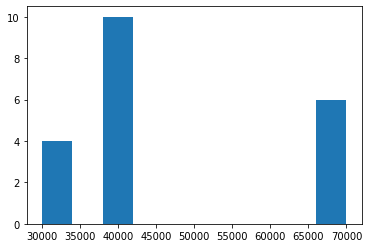

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(pd_df['hp'])

In [ ]:
spark.createDataFrame(pd_df)

DataFrame[land: string, id: bigint, race: string, hp: bigint, avg_hp: double, std_hp: double]

## Writing out


In [ ]:
annotated.write.csv('annotated.csv')

In [ ]:
!head annotated.csv/part-00033-51449480-3d2e-49a4-8064-f9ed1b86d339-c000.csv  

Shire,0,orc,70000,47000.0,16363.91694484477
Shire,2,elf,40000,47000.0,16363.91694484477
Shire,10,elf,40000,47000.0,16363.91694484477
Shire,12,elf,40000,47000.0,16363.91694484477


#### Exercise

Repeat the exercise from the previous notebook, but this time with DataFrames.

Get stats for all tickets with destination MAD from `coupons150720.csv`.

You will need to extract ticket amounts with destination MAD, and then calculate:

1. Total ticket amounts per origin
2. Top 10 airlines by average amount

In [ ]:
!zcat coupon150720.csv.gz | head -n 5 

79062005698500,1,MAA,AUH,9W,9W,56.79,USD,1,H,H,0526,150904,OK,IAF0
79062005698500,2,AUH,CDG,9W,9W,84.34,USD,1,H,H,6120,150905,OK,IAF0
79062005924069,1,CJB,MAA,9W,9W,60.0,USD,1,H,H,2768,150721,OK,IAA0
79065668570385,1,DEL,DXB,9W,9W,160.63,USD,2,S,S,0546,150804,OK,INA0
79065668737021,1,AUH,IXE,9W,9W,152.46,USD,1,V,V,0501,150803,OK,INA0


1) Extract the fields you need (c0,c1,c2,c3,c4 and c6) into a dataframe with proper names and types

Remember, you want to calculate:

Total ticket amounts per origin

Top 10 airlines by average amount

In [ ]:
coupons = spark.sql('''SELECT CAST(_c0 AS BIGINT) AS tkt_number,
                              CAST(_c1 AS INT) AS cpn_number,
                              _c2 AS origin,
                              _c3 AS dest,
                              _c4 AS carrier,
                              CAST(_c6 AS FLOAT) AS amount
                       FROM csv.`coupon150720.csv.gz`''')

coupons

DataFrame[tkt_number: bigint, cpn_number: int, origin: string, dest: string, carrier: string, amount: float]

2) Total ticket amounts per origin


In [ ]:
coupons.where(coupons['dest'] == 'MAD')\
       .groupby('origin')\
       .sum('amount').show(5)

+------+------------------+
|origin|       sum(amount)|
+------+------------------+
|   PMI| 40547.17005729675|
|   YUL|284.44000244140625|
|   HEL| 8195.760055541992|
|   SXB| 264.4599914550781|
|   UIO| 8547.599964141846|
+------+------------------+
only showing top 5 rows



3) Top 10 Airlines by average amount



In [ ]:
coupons.where(coupons['dest'] == 'MAD')\
       .groupBy('carrier')\
       .avg('amount')\
       .sort('avg(amount)', ascending=False)\
       .show(10)

+-------+------------------+
|carrier|       avg(amount)|
+-------+------------------+
|     V0| 5418.098665364583|
|     AC|  740.619985961914|
|     KE| 688.5261500431941|
|     SV|  553.174259916265|
|     OB| 535.5044420030382|
|     AR| 513.5304808843704|
|     AV| 450.1950941518613|
|     AM| 440.7342111687911|
|     C2| 397.8699951171875|
|     LA|379.95370341954606|
+-------+------------------+
only showing top 10 rows



## Further Reading

https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

https://www.datacamp.com/community/tutorials/apache-spark-python

https://spark.apache.org/docs/2.2.0/sql-programming-guide.html

https://ogirardot.wordpress.com/2015/05/29/rdds-are-the-new-bytecode-of-apache-spark/

https://stackoverflow.com/questions/36822224/what-are-the-pros-and-cons-of-parquet-format-compared-to-other-formats

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_SQL_Cheat_Sheet_Python.pdf